# Introdução ao STAC com AWS

In [6]:
import pystac_client


#### Conexão com o bdc aws

In [7]:
service = pystac_client.Client.open("https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/catalog.json")
service

/home/reginaldo/Documentos/leitor_satelite/todos_os_estudos/venv/lib/python3.10/site-packages/pystac_client/client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


<Client id=bdc-sentinel-2>

#### Visualizando as coleções disponíveis

In [8]:
for collection in service.get_collections():
    print(collection)

/home/reginaldo/Documentos/leitor_satelite/todos_os_estudos/venv/lib/python3.10/site-packages/pystac_client/client.py:441: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


<CollectionClient id=S2-16D-2>


In [9]:
collection = service.get_collection('S2-16D-1')
collection.to_dict()

/home/reginaldo/Documentos/leitor_satelite/todos_os_estudos/venv/lib/python3.10/site-packages/pystac_client/client.py:405: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


{'type': 'Collection',
 'id': 'S2-16D-2',
 'stac_version': '1.0.0',
 'description': 'This datacube was generated using all available surface reflectance images processed using Sen2cor. The data is provided with 10 meters of spatial resolution, reprojected and cropped to BDC_SM grid, considering a temporal compositing function of 16 days using the best pixel approach (Least Cloud Cover First).\nThe version 1 of the product was generated using BDC_SM grid version 1, while the version 2 of the product was generated using BDC_SM grid version 2. Version 2 is the most updated version of the product and is being updated to contemplate the entire timeline produced for first version, in addition to having more recent dates.',
 'links': [{'rel': 'root',
   'href': 'https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/catalog.json',
   'type': 'application/json',
   'title': 'BDC EO Data Cubes for Sentinel-2'},
  {'rel': 'license',
   'href': 'https://sentinel.esa.int/documents/247904/690755/Sentine

#### Como o catálogo é estático, devemos percorrer todo o catálogo, assim podendo levar muito tempo para terminar, no exemplo abaixo, a região de interesse já foi escolhida

In [10]:
# Display an item only
catalog_201809 = pystac_client.Client.open('https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/catalog.json')

for item in catalog_201809.get_all_items():
    print(item)

/home/reginaldo/Documentos/leitor_satelite/todos_os_estudos/venv/lib/python3.10/site-packages/pystac_client/client.py:463: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("ITEM_SEARCH")


<Item id=S2-16D_V1_079085_20180914>
<Item id=S2-16D_V1_079085_20180930>


#### Visualização padrão dos assets, mostrando os links e keys

In [11]:
assets = item.assets

In [12]:
for k in assets.keys():
    print(k)

B01
B02
B03
B04
B05
B06
B07
B08
B09
B11
B12
B8A
EVI
SCL
NDVI
CLEAROB
TOTALOB
thumbnail
PROVENANCE


In [13]:
blue_asset = assets['B02']
blue_asset

<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B02.tif>

In [14]:
for asset in assets.values():
    print(asset)

<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B01.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B02.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B03.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B04.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B05.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B06.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B07.tif>
<Asset href=https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B

#### Usando rasterio e Numpy para ler as image files

In [15]:
import rasterio

In [16]:
# with rasterio.open(assets['B08'].href) as nir_ds:
#     nir = nir_ds.read(1)

#### A próxima célula recupera um subconjunto de uma imagem para fazer um array

In [17]:
from rasterio.windows import Window


In [18]:
def read(uri: str, window: Window, masked: bool = True):
    """Lê uma raster window como numpy.ma.masked.array"""
    with rasterio.open(uri) as ds:
        return ds.read(1, window=window, masked=masked)

#### Especificando o subconjunto do arquivo de imagem para ser lido. Lendo um intervalo que começa no pixel 0,0 com 500x500 para RGB

In [21]:
red = read(assets['B04'].href, window=Window(0, 0, 500, 500)) # Window(col_off, row_off, width, height)

green = read(assets['B03'].href, window=Window(0, 0, 500, 500))

blue = read(assets['B02'].href, window=Window(0, 0, 500, 500))



In [22]:
blue

masked_array(
  data=[[377, 366, 341, ..., 349, 334, 334],
        [367, 363, 318, ..., 351, 336, 336],
        [371, 364, 321, ..., 352, 340, 341],
        ...,
        [458, 418, 417, ..., 325, 348, 364],
        [445, 428, 430, ..., 321, 353, 359],
        [425, 427, 422, ..., 324, 332, 339]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=-9999,
  dtype=int16)

#### Usando Matplotlib para visualizar as imagens

In [23]:
from matplotlib import pyplot as plt


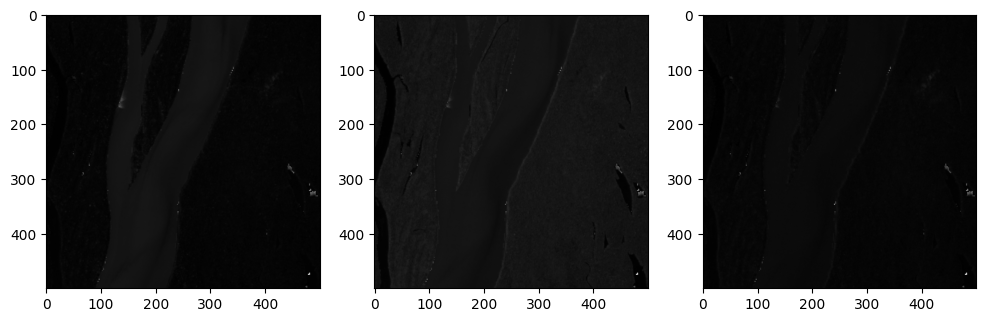

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

#### Usando numpy para agrupar os arrays e usar matplotlib para plotar uma imagem colorida

In [25]:
import numpy

In [28]:
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

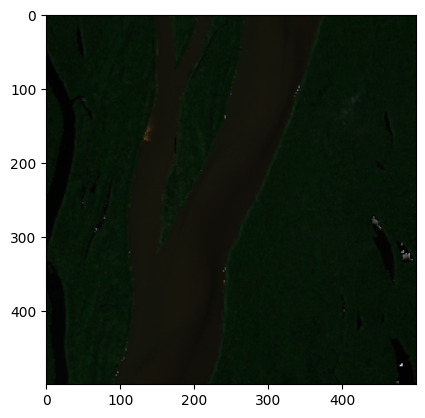

In [29]:
rgb = numpy.dstack((normalize(red),normalize(green),normalize(blue)))
plt.imshow(rgb)

In [32]:
import os
from urllib.parse import urlparse

import requests
from pystac import Asset
from tqdm import tqdm

def download(asset: Asset, directory: str = None, chunk_size: int = 1024 * 16, **request_options) -> str:
    """
    Esse método usa uma validação checksum e mostra uma barra de progresso do download
    """
    if directory is None:
        directory = ''

    response = requests.get(asset.href, stream=True, **request_options)
    output_file = os.path.join(directory, urlparse(asset.href)[2].split('/')[-1])
    os.makedirs(directory, exist_ok=True)
    total_bytes = int(response.headers.get('content-lenght', 0))
    with tqdm.wrapattr(open(output_file, 'wb'),'write', miniters=1, total=total_bytes, desc=os.path.basename(output_file)) as fout:
        for chunk in response.iter_content(chunk_size=chunk_size):
            fout.write(chunk)

download(assets['B08'], 'img')
# for asset in assets.values():
#     download(asset, 'images')


S2-16D_V1_079085_20180930_B08.tif: 369MB [06:38, 973kB/s]  


In [30]:
blue_asset.href


'https://bdc-sentinel-2.s3.us-west-2.amazonaws.com/s2-16d/v1/079/085/2018/09/30/S2-16D_V1_079085_20180930_B02.tif'